### Import configuration and data.

In [1]:
%load_ext autoreload
%autoreload 2

from trainer import *

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using {} device".format(device))

configfile = 'base_SNL_MSU_DOE_avg'

trainer = Trainer(device=device)
## Set params
trainer.load_config(default_configfile=configfile)
## Set datasets
trainer.load_data()

Using cpu device
{'project': 'SNL_MSU_DOE_avg', 'model': 'MLP', 'loss': 'rmse', 'split_by': 'random', 'bayes_opt': False, 'patience': 500, 'epoch': 2000, 'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024, 'static_params': {'patience': 500, 'epoch': 2000}, 'chosen_params': {'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}, 'layers': [16, 64, 128, 128, 64, 16], 'n_calls': 200, 'sequence': True, 'SPACEs': {'lr': {'low': 0.001, 'high': 0.05, 'prior': 'log-uniform'}, 'weight_decay': {'low': 1e-05, 'high': 0.05, 'prior': 'log-uniform'}, 'batch_size': {'categories': [32, 64, 128, 256, 512, 1024, 2048, 4096]}}, 'feature_names_type': {'Percentage of Fibre in 0-deg Direction': 1, 'Percentage of Fibre in 45-deg Direction': 1, 'Percentage of Fibre in 90-deg Direction': 1, 'Percentage of Fibre in Other Direction': 1, 'Absolute Maximum Stress': 0, 'Absolute Peak-to-peak Stress': 0, 'Frequency': 0, 'Fibre Volumn Fraction': 1, 'Relative Maximum Stress': 0, 'Relative Peak-to-peak Stress': 0

### Gaussian process-based Bayes hyperparameter optimization (Optional)

In [2]:
trainer.params = trainer.bayes()
print(trainer.params)

Bayes optimization not activated in configuration file. Return preset chosen_params.
{'lr': 0.003, 'weight_decay': 0.002, 'batch_size': 1024}


### Training

Epoch: 1/2000, Train loss: 4.4316, Val loss: 3.1818, Min val loss: 3.1818
Epoch: 100/2000, Train loss: 0.5057, Val loss: 0.7076, Min val loss: 0.7058
Epoch: 200/2000, Train loss: 0.4045, Val loss: 0.6517, Min val loss: 0.6517
Epoch: 300/2000, Train loss: 0.3935, Val loss: 0.6736, Min val loss: 0.6402
Epoch: 400/2000, Train loss: 0.3139, Val loss: 0.6836, Min val loss: 0.6360
Epoch: 500/2000, Train loss: 0.2923, Val loss: 0.6487, Min val loss: 0.6360
Epoch: 600/2000, Train loss: 0.3019, Val loss: 0.6591, Min val loss: 0.6360
Epoch: 700/2000, Train loss: 0.3013, Val loss: 0.6922, Min val loss: 0.6360
Epoch: 800/2000, Train loss: 0.2371, Val loss: 0.6588, Min val loss: 0.6360
Early stopping at epoch 848, Checkpoint at epoch 348, Train loss: 0.3441, Val loss: 0.6360
Minimum loss: 0.6360244154930115


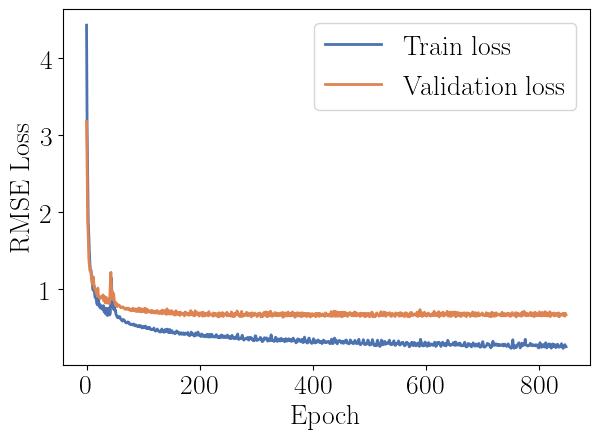

In [3]:
trainer.train()
trainer.plot_loss()

### Plotting predictions and comparing with baseline models.

Train Loss: 0.3516, R2: 0.9277
Validation Loss: 0.6360, R2: 0.7535
Test Loss: 0.6650, R2: 0.6817


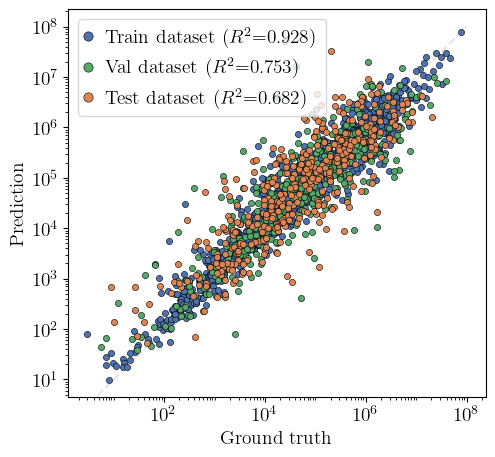

In [4]:
trainer.plot_truth_pred()

Dataset size: 2371 790 792
Train Loss: 0.6021, R2: 0.7787
Validation Loss: 0.5808, R2: 0.7809
Test Loss: 0.5601, R2: 0.8154


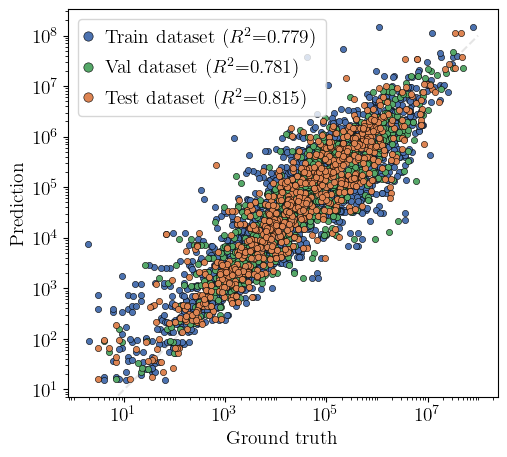

In [5]:
trainer.load_data(data_path='../data/SNL_MSU_DOE_fatigue.xlsx')
trainer.plot_truth_pred()

Train Loss: 0.2373, R2: 0.9656
Train Loss: 0.5225, R2: 0.8227
Test Loss: 0.4940, R2: 0.8564


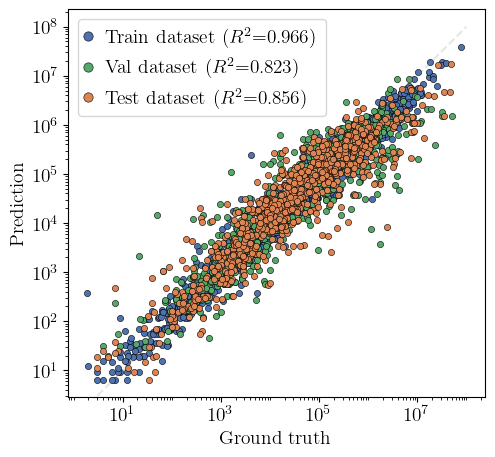

In [6]:
trainer.plot_truth_pred_sklearn(model_name='rf')

In [7]:
trainer.plot_truth_pred_sklearn(model_name='tabnet')

/home/xlluo/hdd/ML-fracture/venv/lib/python3.6/site-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 3.67644 | val_0_rmse: 30.59113|  0:00:00s
epoch 100| loss: 0.69085 | val_0_rmse: 0.90279 |  0:00:05s
epoch 200| loss: 0.60755 | val_0_rmse: 0.67991 |  0:00:10s
epoch 300| loss: 0.54657 | val_0_rmse: 0.60889 |  0:00:16s
epoch 400| loss: 0.52402 | val_0_rmse: 0.61823 |  0:00:22s
epoch 500| loss: 0.49916 | val_0_rmse: 0.60831 |  0:00:28s
epoch 600| loss: 0.47953 | val_0_rmse: 0.58139 |  0:00:33s


KeyboardInterrupt: 

### Permutation feature importance

In [ ]:
trainer.plot_feature_importance()

### Partial dependence

In [ ]:
trainer.plot_partial_dependence()

In [ ]:
trainer.plot_partial_err()

In [ ]:
trainer.autogluon_tests(verbose=True)


-------------Run AutoGluon Tests-------------



Presets specified: ['best_quality']
Beginning AutoGluon training ...
AutoGluon will save models to "../output/SNL_MSU_DOE_avg/autogluon/"
AutoGluon Version:  0.3.1
Train Data Rows:    1540
Train Data Columns: 14
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (7.893456017639177, 0.47712125471966244, 4.60403, 1.30169)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    22150.3 MB
	Train Data (Original)  Memory Usage: 0.17 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of t

In [ ]:
trainer.pytorch_tabular_tests(verbose=True)